In [1]:
import pandas as pd #untuk membaca data
import numpy as np #untuk perhitungan
import matplotlib.pyplot as plt #untuk visualisasi data

Ini adalah library yang digunakan untuk membaca dan memanipulasi data, memanipulasi data berupa categorical dan numerik, lalu memvisualisasikan data.

In [2]:
df = pd.read_csv(r"D:\KULIAH DIFA\Semester 7 HUHU\Machine Learning\Minggu 9\Salary_Data_1.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


Kode ini digunakan untuk membaca data melalui file excel lalu melihat data 5 tearatas.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


Kode ini digunakan untuk melihat info berbagai tipe yang ada pada data. Disini terdapat beberapa type ada yang object 3 buah dan float 3 buah.

In [4]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


Kode ini digunakan untuk memperlihatkan basic statistic pada dataset yang dimiliki.Terdapat jumlah,rata-rata,standar deviasi,nilai min-max,q1,q2,dan q3. Contoh nilai min pada age terdapat pada angka 21 dan nilai maksimum pada angka 62.

In [5]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

Kode ini berfungsi untuk melihat kolom apa saja yang tertera pada dataset yang dimiliki.

In [6]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

Kode ini digunakan untuk mengecek data yang kosong dan ternyata data yang dimiliki banyak yang kosong atau banyak yang hilang.

In [7]:
# Menghapus baris dengan setidaknya satu nilai yang hilang
df.dropna(inplace=True)

Kode di atas digunakan untuk membersihkan data yang sebelumnya banyak yang rumpang.

In [8]:
# Menghapus kolom dengan setidaknya satu nilai yang hilang
df.dropna(axis=1, inplace=True)

In [9]:
# Import library
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Data
# Gantilah bagian ini dengan data Anda
X = df['Years of Experience'].values.reshape(-1, 1)
y = df['Salary'].values

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Inisialisasi model SVR dengan hyperparameter tertentu
svr_model = SVR(C=1000, gamma=0.05, kernel='rbf')

# Melatih model
svr_model.fit(X_train, y_train)

# Melakukan prediksi pada set pengujian
y_pred = svr_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Sekarang model SVR dengan hyperparameter yang telah ditentukan sudah dilatih dan diuji.
# Anda dapat menggunakannya untuk membuat prediksi pada data baru.

Mean Squared Error: 741388649.4180229


Kode yang ditunjukkan telah melatih model SVR (Support Vector Regression) menggunakan data X sebagai fitur ('Years of Experience') dan y sebagai target ('Salary'). Setelah melatih model dengan menggunakan train_test_split untuk membagi data menjadi data train dan data test, Anda mengevaluasi performa model menggunakan metrik Mean Squared Error (MSE) pada data test.

Sekarang, setelah model dilatih dan diuji, kita dapat menggunakannya untuk membuat prediksi pada data baru. Dengan menggunakan svr_model.predict() pada fitur yang relevan (misalnya, 'Years of Experience') dari data baru, kita dapat memperkirakan nilai gaji yang sesuai berdasarkan model yang telah dilatih sebelumnya. Hal ini memungkinkan untuk mengaplikasikan model ini pada situasi dunia nyata, di mana kita memiliki data baru dan ingin memprediksi nilai gaji berdasarkan pengalaman yang tidak pernah dilihat oleh model sebelumnya.

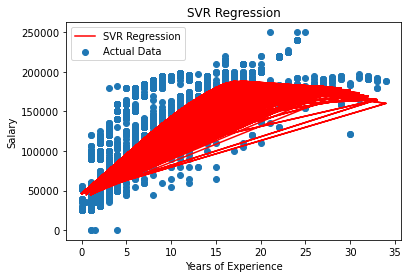

In [10]:
import matplotlib.pyplot as plt

# Visualisasi data dan model
plt.scatter(X, y, label='Actual Data')
plt.plot(X, svr_model.predict(X), color='red', label='SVR Regression')

# Label sumbu
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Menambahkan judul
plt.title('SVR Regression')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()


Garis merah yang ditampilkan adalah representasi dari model regresi yang telah dilatih berdasarkan data yang Anda gunakan. Tujuan dari visualisasi ini adalah untuk memberikan pemahaman visual tentang seberapa baik model cocok dengan data aktual, serta untuk melihat pola atau tren dari prediksi model terhadap data aktual. Semakin dekat garis regresi dengan titik-titik data aktual, semakin baik model mampu mempelajari hubungan antara variabel prediktor ('Years of Experience') dan variabel target ('Salary').

In [11]:
from sklearn.model_selection import GridSearchCV

# Tentukan hyperparameter yang akan diuji
param_grid = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}

# Gunakan GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(svr_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Gunakan model terbaik untuk membuat prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Best Parameters: {'C': 10000, 'gamma': 0.5, 'kernel': 'rbf'}
Mean Squared Error on Test Set: 738110949.5872897


Proses ini memungkinkan untuk menemukan kombinasi parameter terbaik untuk model SVR dan menggunakan model terbaik tersebut untuk membuat prediksi yang lebih baik pada data yang baru.

In [12]:
model_baru = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)

SVR(C=100000, gamma=0.005)

Kode ini ditunjukkan membuat model baru SVR dengan hyperparameter yang telah ditentukan (C=100000, gamma=0.005, kernel='rbf') dan melatih model tersebut menggunakan seluruh dataset (X sebagai fitur dan y sebagai target).

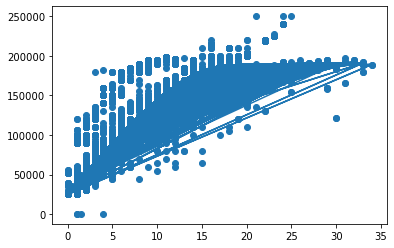

In [13]:
#visualisasikan model
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))

Dengan menjalankan kode ini, kita akan melihat scatter plot dari data aktual dan garis plot yang mewakili prediksi dari model SVR. Garis plot ini menunjukkan bagaimana model dalam "memahami" pola atau tren yang mungkin ada dalam data aktual, yang mencoba untuk menyesuaikan diri dengan data yang Anda berikan. Semakin dekat garis plot dengan titik-titik data aktual, semakin baik model memahami pola di dalam data.